In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.preprocessing import StandardScaler

# Load the wine dataset
wine_data = pd.read_csv('winequality-red.csv')

# Split the dataset into features (X) and target (y)
X = wine_data.drop('quality', axis=1).values  # Input features
y = wine_data['quality'].values  # Target: wine quality

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Standardizing the features

# Add a column of ones to X for the bias term (intercept)
X = np.c_[np.ones(X.shape[0]), X]  # Shape: (1599, 12) -> (1599, 12) including bias

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize parameters (weights and bias)
theta = np.zeros(X_train.shape[1])  # Weights initialized to zero
learning_rate = 0.01  # Step size for gradient descent
n_iterations = 1000  # Number of iterations

# Gradient Descent Implementation
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    m = len(y)  # Number of training samples
    mse_history = []  # To keep track of MSE over iterations
    for iteration in range(n_iterations):
        # Compute predictions
        y_pred = X.dot(theta)
        
        # Calculate gradients
        gradients = (1 / m) * X.T.dot(y_pred - y)
        
        # Update weights
        theta = theta - learning_rate * gradients

        # Calculate and store MSE
        mse = mean_squared_error(y, y_pred)
        mse_history.append(mse)
        
        # Optional: Print loss every 100 iterations
        if iteration % 100 == 0:
            print(f"Iteration {iteration}: MSE = {mse:.4f}")
    
    return theta, mse_history

# Run gradient descent to optimize theta (weights)
theta, mse_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

# Make predictions on the test set
y_pred_test = X_test.dot(theta)

# Calculate RMSE on test data
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Gradient Descent Linear Regression RMSE: {rmse:.4f}")

Iteration 0: MSE = 32.2791
Iteration 100: MSE = 4.6913
Iteration 200: MSE = 1.0016
Iteration 300: MSE = 0.5044
Iteration 400: MSE = 0.4365
Iteration 500: MSE = 0.4267
Iteration 600: MSE = 0.4251
Iteration 700: MSE = 0.4247
Iteration 800: MSE = 0.4245
Iteration 900: MSE = 0.4244
Gradient Descent Linear Regression RMSE: 0.6245


In [23]:
# Print final weights and RMSE
print("Final Weights (Theta):")
print(theta)
print(f"RMSE: {rmse:.4f}")

Final Weights (Theta):
[ 5.62902047  0.06194172 -0.17147446 -0.01589708  0.01833775 -0.08712809
  0.05685925 -0.11943133 -0.0480781  -0.04379604  0.14751066  0.28140614]
RMSE: 0.6245


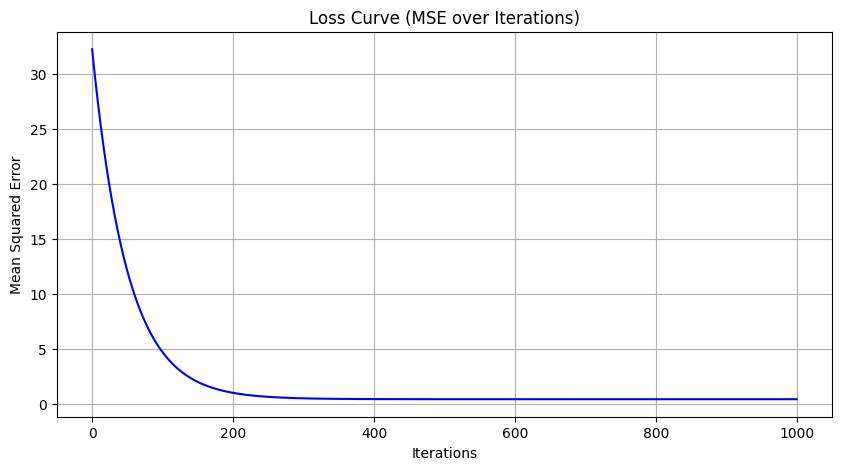

In [20]:
# Plotting Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(mse_history, color='blue')
plt.title("Loss Curve (MSE over Iterations)")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.grid()
plt.show()

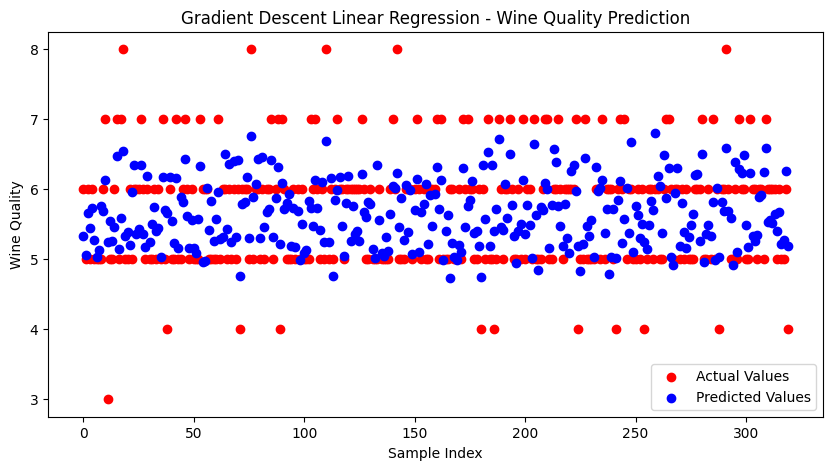

In [21]:
# Plotting actual vs predicted values for a subset of test data
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color='r', label='Actual Values')
plt.scatter(range(len(y_pred_test)), y_pred_test, color='b', label='Predicted Values')
plt.title("Gradient Descent Linear Regression - Wine Quality Prediction")
plt.xlabel('Sample Index')
plt.ylabel('Wine Quality')
plt.legend()
plt.show()

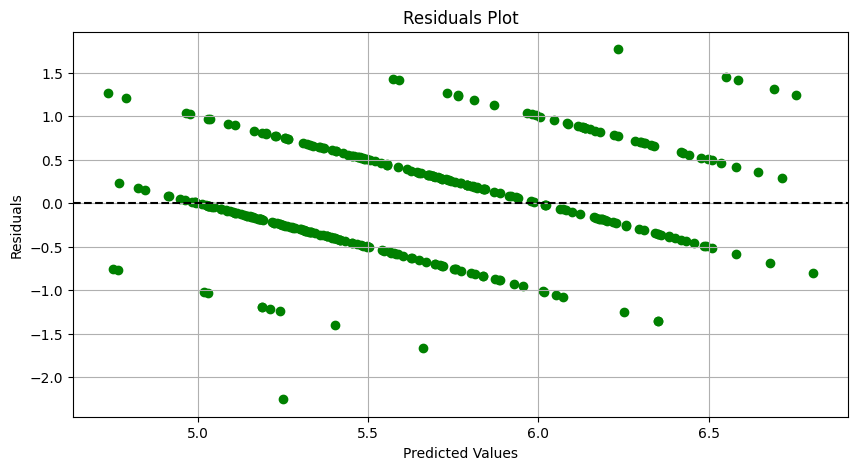

In [22]:
# Residuals Plot
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_test, residuals, color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()